# Cross-Model Embeddings Autonomous Clustering 

What this demo does:

- Create exemplar dataset of three classes of ~40 examples each (e.g. of topics with distinct semantic)
- Embed all of the exemplars using MPNET and SBERT, load into a contiguous dataset
- Take K-means cluster of each, using the Silhouette score to determine optimal K
- Compute the contingency matrix of the respective clusters between models, in effect computing the maximum cluster overlap between samples in the clustering, generating a cross-model cluster similarity score for the sample between 0 and 1.
- Reduce dimensions using t-Distributed Stochastic Neighbor Embedding (t-SNE), visualize clusters in MPNET and SBERT space, plot true labels as a baseline

This serves as a demonstration toward creating a k-means based loss, and is extended in ```./randomKMeans.ipynb```

### Exemplar sentences split into three classes (~40 of each)

In [1]:
cat_sentences = [
    "A cat nimbly climbing a tall oak tree in the backyard.",
    "A curious cat intently watching a fluttering butterfly.",
    "A playful cat chasing its own tail in a sunlit room.",
    "An adventurous cat exploring the mysterious attic.",
    "A lazy cat lounging in a cozy sunbeam on a chilly morning.",
    "A sneaky cat quietly stalking a toy mouse.",
    "A hungry cat patiently waiting beside its food bowl.",
    "A sociable cat rubbing against a visitor's legs.",
    "A skillful cat leaping onto a high shelf with ease.",
    "A cautious cat hesitantly approaching a new pet bed.",
    "A determined cat trying to catch a dripping water faucet.",
    "A caring mother cat grooming her playful kittens.",
    "A curious cat investigating a rustling paper bag.",
    "An agile cat effortlessly balancing on a fence post.",
    "A playful cat batting at a dangling piece of string.",
    "A mischievous cat sneaking into an open cupboard.",
    "A sleepy cat curled up in a cozy blanket.",
    "A talkative cat meowing for attention from its owner.",
    "A brave cat standing up to a much larger dog.",
    "An intelligent cat figuring out how to open a door."
    "Cats are domesticated mammals known for their independent nature.",
    "They belong to the family Felidae and are popular pets worldwide.",
    "Cats have been companions to humans for thousands of years.",
    "There are over 70 different breeds of domestic cats, each with its unique characteristics.",
    "Cats are known for their agility and are excellent hunters.",
    "They have retractable claws that they use for climbing and catching prey.",
    "Cats are crepuscular animals, which means they are most active during dawn and dusk.",
    "A cat's purring is often associated with contentment and can also be a sign of distress.",
    "Cats communicate through a variety of vocalizations, including meowing, purring, and hissing.",
    "Their whiskers are highly sensitive and help them navigate in low light conditions.",
    "Cats are obligate carnivores, which means they require a diet primarily consisting of meat.",
    "They are known for their grooming habits and spend a significant amount of time cleaning themselves.",
    "Cats have a strong territorial instinct and may mark their territory with scent markings.",
    "Kittens are born blind and deaf, and their eyes typically open around 10 days of age.",
    "The average lifespan of a domestic cat is around 15 years, but some can live much longer.",
    "Cats have been revered and even worshipped in various cultures throughout history.",
    "In ancient Egypt, cats were considered sacred and were associated with the goddess Bastet.",
    "Cats have a strong prey drive and may chase after birds, mice, or other small animals.",
    "Many superstitions and myths are associated with cats, both positive and negative.",
    "Cats have been featured in literature, art, and folklore for centuries, making them a beloved and iconic animal."
]

airplane_sentences = [
    "Airplanes use wings to generate lift and stay in the air.",
    "Aerodynamics is the study of how air interacts with objects in motion.",
    "The shape of an airplane's wings greatly affects its aerodynamic performance.",
    "Aircraft design involves optimizing aerodynamic efficiency for fuel savings.",
    "Drag is the resistance force that opposes an aircraft's motion through the air.",
    "Airfoil designs play a crucial role in creating lift for airplanes.",
    "Streamlining reduces aerodynamic drag, making airplanes more efficient.",
    "Supersonic flight requires specialized aerodynamic considerations.",
    "Aircraft manufacturers conduct wind tunnel testing to study aerodynamics.",
    "The angle of attack determines an airplane's lift and stall characteristics.",
    "Turbulence can disrupt an aircraft's aerodynamic stability.",
    "Aircraft control surfaces, like ailerons and flaps, affect aerodynamics.",
    "Jet engines rely on aerodynamic principles to produce thrust.",
    "The boundary layer is a thin layer of air near an aircraft's surface that affects aerodynamics.",
    "Airfoil camber influences lift and drag characteristics.",
    "Aircraft designers strive to minimize parasitic drag for better performance.",
    "Aerodynamic forces include lift, weight, thrust, and drag.",
    "Winglets are added to wings to improve aerodynamic efficiency.",
    "Aerodynamics also plays a crucial role in the design of race cars.",
    "Aircraft wing aspect ratio affects lift and stability."
    "Airplanes rely on the principles of aerodynamics to achieve flight.",
    "Wings generate lift through the Bernoulli principle, allowing planes to stay airborne.",
    "Aerodynamic design plays a crucial role in reducing drag and improving fuel efficiency.",
    "The shape of an airplane's fuselage is designed to minimize air resistance.",
    "Flaps and slats on wings can be extended to increase lift during takeoff and landing.",
    "Ailerons on the wings are used for roll control, allowing the airplane to bank left or right.",
    "Rudders on the tail control yaw, which helps maintain stability during flight.",
    "Airfoil shapes are carefully designed to optimize lift and minimize drag.",
    "The angle of attack of an airplane's wings affects its lift and stall characteristics.",
    "Supersonic airplanes like the Concorde experience shock waves and sonic booms.",
    "Mach number is used to denote the speed of an airplane relative to the speed of sound.",
    "Jet engines work on the principle of jet propulsion, expelling high-speed exhaust gases.",
    "Turboprop engines are commonly used in smaller regional aircraft for their efficiency.",
    "Winglets at the tips of wings reduce drag and improve fuel efficiency.",
    "Aerodynamic testing in wind tunnels helps engineers refine aircraft designs.",
    "Fly-by-wire systems use computer control to assist pilots in managing aerodynamic forces.",
    "Stall speed is the minimum speed at which an airplane can maintain level flight.",
    "Swept-wing designs are often used in high-speed military aircraft.",
    "Conventional aircraft have a tailplane at the rear for stability and control.",
    "Airplanes are subject to various aerodynamic forces, including lift, weight, thrust, and drag."
    "The f-35 is a fifth-generation fighter jet designed for stealth and maneuverability.",
]

furniture_sentences = [
    "The sleek, modern sofa in the living room complements the minimalist interior design.",
    "A vintage wooden bookshelf adds a touch of nostalgia to the study.",
    "The kitchen appliances are all stainless steel, giving the space a contemporary look.",
    "The chandelier in the dining room adds an elegant and luxurious feel to the space.",
    "A well-placed area rug can tie together the various elements of a room's design.",
    "A leather recliner in the corner of the den is the perfect spot to relax with a book.",
    "The open shelving in the kitchen allows for easy access to cookware and dishes.",
    "A wall-mounted television creates a clean and uncluttered look in the living room.",
    "The coffee table in the center of the room is made of reclaimed wood.",
    "A ceiling fan can provide both comfort and a decorative element to a room.",
    "The master bedroom features a canopy bed with flowing curtains.",
    "A glass dining table can make a small dining area appear more spacious.",
    "The bathroom vanity is adorned with marble countertops and brushed nickel fixtures.",
    "A walk-in closet provides ample storage space for clothing and accessories.",
    "The sound system is integrated into the walls, eliminating the need for bulky speakers.",
    "A gallery wall of framed artwork adds personality to the living room.",
    "The minimalist design of the office desk promotes productivity and focus.",
    "A sliding barn door separates the kitchen from the dining area.",
    "The outdoor patio is furnished with wicker chairs and a matching table.",
    "An accent wall in the bedroom is painted in a bold, deep color.",
    "A crystal chandelier in the foyer creates a grand and welcoming entrance.",
    "The open concept layout allows for easy flow between the kitchen and living room.",
    "A pendant light above the kitchen island serves as a focal point.",
    "The nursery is decorated with pastel colors and soft, plush furnishings.",
    "A freestanding bathtub is the centerpiece of the luxurious master bathroom.",
    "The study is equipped with built-in bookshelves for a cozy reading nook.",
    "A leather sectional sofa provides ample seating in the family room.",
    "The fireplace in the living room is clad in natural stone for a rustic look.",
    "A wall-mounted mirror in the hallway creates the illusion of more space.",
    "The home office features ergonomic furniture to promote comfort during work hours.",
    "A vintage record player adds a retro touch to the entertainment center.",
    "The guest bedroom is designed with a coastal theme, complete with seashell decor.",
    "A skylight in the kitchen brings in natural light and brightens up the space.",
    "The sliding glass doors in the dining room lead to a spacious outdoor deck.",
    "A cozy reading nook is tucked away in a corner of the bedroom.",
    "The entryway features a decorative console table with a stylish mirror above it.",
    "A Persian rug adds warmth and sophistication to the hardwood floor in the living room.",
    "The kitchen island is topped with quartz countertops for durability and elegance."
    "the living room is furnished with a plush sofa and matching armchairs.",
]


### Load each model

In [2]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

sentences = ["This is an example sentence"]
mpnetModel = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
sbertModel = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sbertEmbeddings = sbertModel.encode(sentences)
mpnetEmbeddings = mpnetModel.encode(sentences)

print('MPNET Shape: ',mpnetEmbeddings.shape)
print('SBERT Shape: ',sbertEmbeddings.shape)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MPNET Shape:  (1, 768)
SBERT Shape:  (1, 384)


### Load the precomputed OpenAI embeddings (provided)

In [3]:
oaData = pd.read_csv('./kMeansOpenAIExampleData.csv')
oaData.columns = ['text','openai']
oaData['openai'] = oaData['openai'].apply(lambda x: np.fromstring(x[1:-1], sep=','))
print("OpenAI Shape: ",oaData['openai'].iloc[0].shape)

OpenAI Shape:  (1536,)


### Embed each sentence for both models

In [4]:
mpnetDf = pd.DataFrame(columns=['text', 'content_vector'])
for item in airplane_sentences:
    mpnetDf.loc[len(mpnetDf)]=[item, mpnetModel.encode(item)] 
for item in cat_sentences:
    mpnetDf.loc[len(mpnetDf)]=[item, mpnetModel.encode(item)] 
for item in furniture_sentences:
    mpnetDf.loc[len(mpnetDf)]=[item, mpnetModel.encode(item)]

sbertDf = pd.DataFrame(columns=['text', 'content_vector'])
for item in airplane_sentences:
    sbertDf.loc[len(sbertDf)]=[item, sbertModel.encode(item)]

for item in cat_sentences:
    sbertDf.loc[len(sbertDf)]=[item, sbertModel.encode(item)]

for item in furniture_sentences:
    sbertDf.loc[len(sbertDf)]=[item, sbertModel.encode(item)]
    

### Final dataframe with both embeddings for a single text string

In [5]:
joinedDf = pd.merge(mpnetDf, sbertDf, on='text')
joinedDf=pd.merge(joinedDf, oaData, on='text')
joinedDf = joinedDf.rename(columns={'content_vector_x': 'mpnet', 'content_vector_y': 'sbert'})
joinedDf.head()

,text,mpnet,sbert,openai
0,Airplanes use wings to generate lift and stay ...,"[-0.032066505, 0.0101721585, 0.007098269, 0.04...","[-0.17570242, 0.17407903, -0.2761285, -0.28288...","[0.007158204447478056, -0.004605278372764587, ..."
1,Aerodynamics is the study of how air interacts...,"[-0.038432315, -0.057687193, -0.028642355, 0.0...","[-0.052087866, 0.14714487, -0.0496745, -0.0085...","[-0.0031512079294770956, 0.014766544103622437,..."
2,The shape of an airplane's wings greatly affec...,"[-0.050051153, -0.013780473, -0.033942454, 0.0...","[0.27702045, 0.23905902, -0.072783746, -0.2877...","[-0.00178982550278306, 0.011888324283063412, 0..."
3,Aircraft design involves optimizing aerodynami...,"[-0.009119007, -0.00472138, -0.00025619648, 0....","[0.015273576, 0.77373487, -0.21091804, -0.1965...","[-0.005239626858383417, 0.006284317933022976, ..."
4,Drag is the resistance force that opposes an a...,"[0.028019812, -0.048780337, 0.0018107627, 0.02...","[-0.5130774, 0.03333592, -0.32829592, -0.12031...","[-0.03163076937198639, -0.009218255057930946, ..."


# Clustering
### Compute optimal k-Means for each cluster using silhouette score, then compute the overlap of clusters using a contingency matrix.

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming joinedDf is already defined with 'text', 'mpnet', and 'sbert' columns
joinedDf['mpnet'] = joinedDf['mpnet'].apply(np.array)
joinedDf['sbert'] = joinedDf['sbert'].apply(np.array)
joinedDf['openai'] = joinedDf['openai'].apply(np.array)


# Function to find the optimal number of clusters using silhouette score
def optimal_clusters(data):
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    optimal_k = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
    return optimal_k

# Find optimal clusters for mpnet and sbert embeddings
optimal_k_mpnet = optimal_clusters(np.stack(joinedDf['mpnet']))
optimal_k_sbert = optimal_clusters(np.stack(joinedDf['sbert']))
optimal_k_openai = optimal_clusters(np.stack(joinedDf['openai']))

#we take the minimum of the two optimal clusters, as the best alignment tends to be at the minimum k value 
min_k = min(optimal_k_mpnet, optimal_k_sbert, optimal_k_openai)

# KMeans clustering with optimal number of clusters
kmeans_mpnet = KMeans(n_clusters=min_k, random_state=42,n_init=10)
joinedDf['mpnet_cluster'] = kmeans_mpnet.fit_predict(np.stack(joinedDf['mpnet']))

kmeans_sbert = KMeans(n_clusters=min_k, random_state=42,n_init=10)
joinedDf['sbert_cluster'] = kmeans_sbert.fit_predict(np.stack(joinedDf['sbert']))

kmeans_openai = KMeans(n_clusters=min_k, random_state=42,n_init=10)
joinedDf['openai_cluster'] = kmeans_openai.fit_predict(np.stack(joinedDf['openai']))

# Add true class labels to the DataFrame
joinedDf['true_class'] = [1 if i < 39 else 2 for i in range(len(joinedDf))]
joinedDf.loc[78:, 'true_class'] = 3

# Create pairwise contingency matrices
contingency_matrix_mpnet_sbert = pd.crosstab(joinedDf['mpnet_cluster'], joinedDf['sbert_cluster'])
contingency_matrix_sbert_openai = pd.crosstab(joinedDf['sbert_cluster'], joinedDf['openai_cluster'])
contingency_matrix_openai_mpnet = pd.crosstab(joinedDf['openai_cluster'], joinedDf['mpnet_cluster'])

# Calculate pairwise alignment scores
alignment_score_mpnet_sbert = contingency_matrix_mpnet_sbert.max(axis=1).sum() / joinedDf.shape[0]
alignment_score_sbert_openai = contingency_matrix_sbert_openai.max(axis=1).sum() / joinedDf.shape[0]
alignment_score_openai_mpnet = contingency_matrix_openai_mpnet.max(axis=1).sum() / joinedDf.shape[0]

# Print the pairwise contingency matrices and alignment scores
print("Contingency Matrix (MPNet vs SBERT):\n", contingency_matrix_mpnet_sbert)
print("\nCluster Alignment Score (MPNet vs SBERT):", alignment_score_mpnet_sbert)

print("\nContingency Matrix (SBERT vs OpenAI):\n", contingency_matrix_sbert_openai)
print("\nCluster Alignment Score (SBERT vs OpenAI):", alignment_score_sbert_openai)

print("\nContingency Matrix (OpenAI vs MPNet):\n", contingency_matrix_openai_mpnet)
print("\nCluster Alignment Score (OpenAI vs MPNet):", alignment_score_openai_mpnet)



Contingency Matrix (MPNet vs SBERT):
 sbert_cluster   0   1   2
mpnet_cluster            
0              37   2   0
1               0  38   0
2               0   0  39

Cluster Alignment Score (MPNet vs SBERT): 0.9827586206896551

Contingency Matrix (SBERT vs OpenAI):
 openai_cluster   0   1   2
sbert_cluster             
0               37   0   0
1                2  38   0
2                0   0  39

Cluster Alignment Score (SBERT vs OpenAI): 0.9827586206896551

Contingency Matrix (OpenAI vs MPNet):
 mpnet_cluster    0   1   2
openai_cluster            
0               39   0   0
1                0  38   0
2                0   0  39

Cluster Alignment Score (OpenAI vs MPNet): 1.0


# Dimensionality reduction and visualization

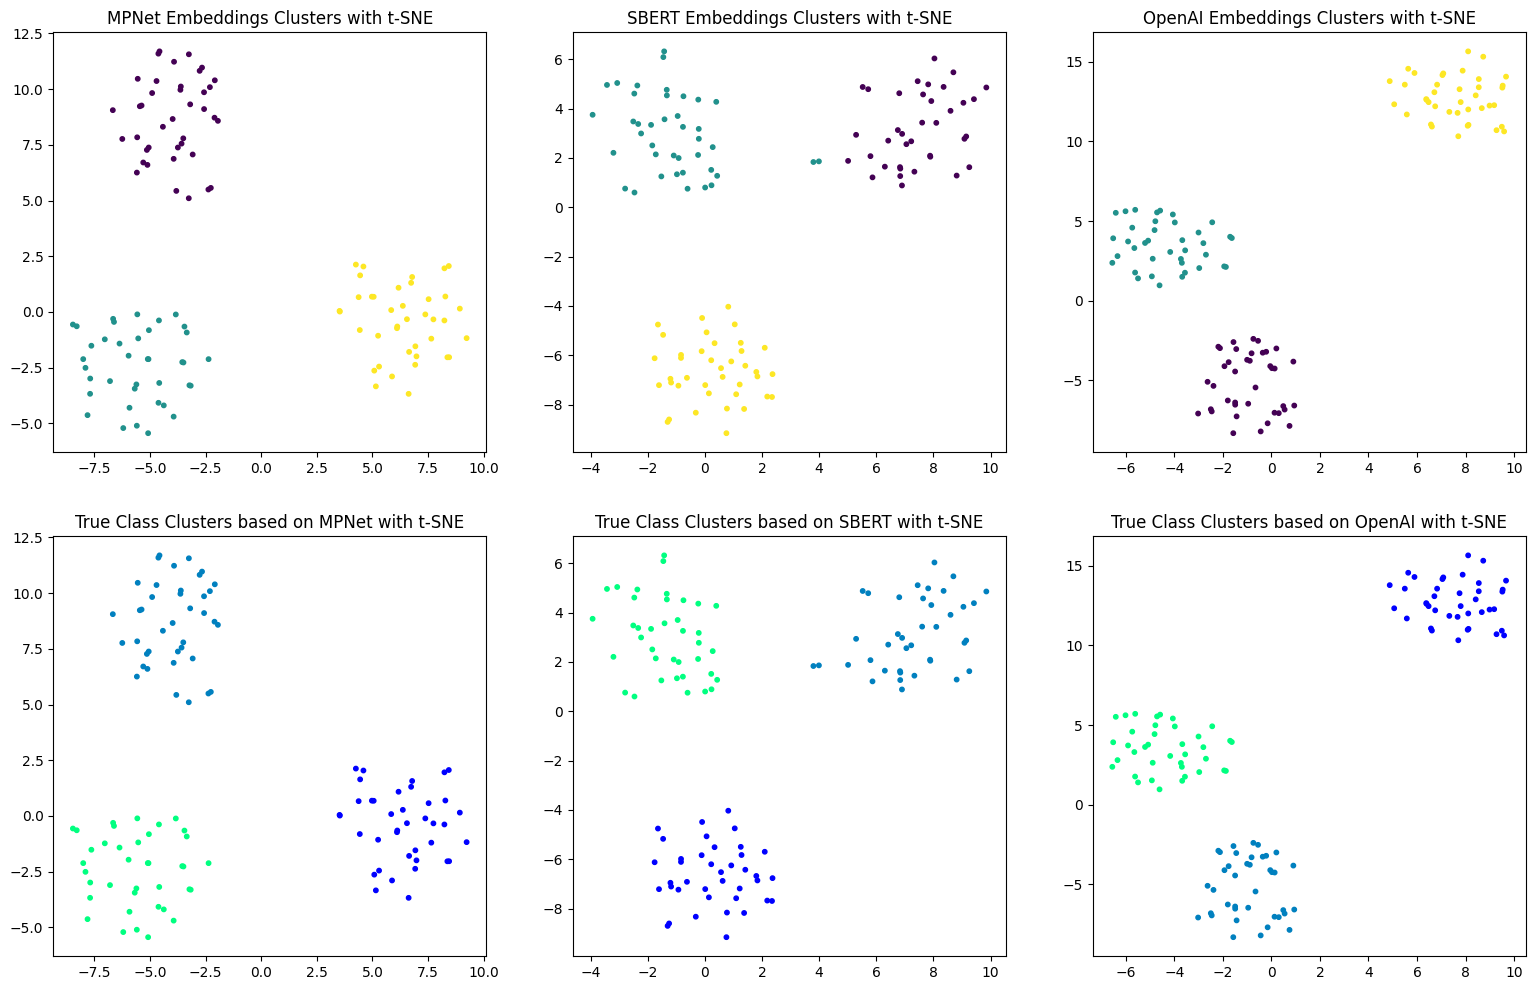

In [15]:
# Create a color mapping based on the contingency matrix
num_clusters = min_k 
color_mapping = []

# t-SNE for dimensionality reduction to 2D
tsne_model = TSNE(n_components=2, random_state=42)

# Projecting mpnet embeddings to 2D
mpnet_2d = tsne_model.fit_transform(np.stack(joinedDf['mpnet']))

# Projecting sbert embeddings to 2D
sbert_2d = tsne_model.fit_transform(np.stack(joinedDf['sbert']))

# Projecting openai embeddings to 2D
openai_2d = tsne_model.fit_transform(np.stack(joinedDf['openai']))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(19, 12))

# Plot for mpnet clusters with corresponding colors
axes[0, 0].scatter(mpnet_2d[:, 0], mpnet_2d[:, 1], c=joinedDf['mpnet_cluster'], cmap='viridis', s=10)
axes[0, 0].set_title('MPNet Embeddings Clusters with t-SNE')

# Plot for sbert clusters with corresponding colors
axes[0, 1].scatter(sbert_2d[:, 0], sbert_2d[:, 1], c=joinedDf['sbert_cluster'], cmap='viridis', s=10)
axes[0, 1].set_title('SBERT Embeddings Clusters with t-SNE')

# Plot for openai clusters with corresponding colors
axes[0, 2].scatter(openai_2d[:, 0], openai_2d[:, 1], c=joinedDf['openai_cluster'], cmap='viridis', s=10)
axes[0, 2].set_title('OpenAI Embeddings Clusters with t-SNE')

# Plot for true classes based on mpnet embeddings
axes[1, 0].scatter(mpnet_2d[:, 0], mpnet_2d[:, 1], c=joinedDf['true_class'], cmap='winter', s=10)
axes[1, 0].set_title('True Class Clusters based on MPNet with t-SNE')

# Plot for true classes based on sbert embeddings
axes[1, 1].scatter(sbert_2d[:, 0], sbert_2d[:, 1], c=joinedDf['true_class'], cmap='winter', s=10)
axes[1, 1].set_title('True Class Clusters based on SBERT with t-SNE')

# Plot for true classes based on openai embeddings
axes[1, 2].scatter(openai_2d[:, 0], openai_2d[:, 1], c=joinedDf['true_class'], cmap='winter', s=10)
axes[1, 2].set_title('True Class Clusters based on OpenAI with t-SNE')

plt.show()